# Unsupervised Machine Learning: Clustering

## Contents:
### 1. Importing Libraries and Data
### 2. Standardize Data w/ standardscaler 
### 3. "Elbow" Technique
### 4. k-means Clustering

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler # For standardizing data
import pylab as pl 

In [2]:
# Just want to ensure the graphs created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Turning project folder into string path 
path = r'C:\Users\keirr\12-2023 U.S Housing Market Analysis'

In [4]:
# Importing dataset with path
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Housing_Data_Cleaned.pkl'))

In [5]:
# Checking shape
df.shape

(39017, 14)

In [6]:
# Looking at df
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260


### Excluding categorical data by subsetting 

In [7]:
df2 = df[['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Median Household Income']]

In [8]:
# Calling subset
df2

,Price,Beds,Baths,Living Space,Zip Code Population,Median Household Income
0,3999000.0,2,3,1967,29563,370046.0
2,1650000.0,1,1,718,29815,249880.0
3,760000.0,3,2,1538,29815,249880.0
4,1100000.0,1,1,600,29815,249880.0
5,764900.0,1,1,643,15514,188289.0
...,...,...,...,...,...,...
39976,2495000.0,4,4,3380,22890,205611.0
39977,2295000.0,4,4,2878,22890,205611.0
39978,950000.0,3,2,1380,22890,205611.0
39979,425000.0,2,1,856,22890,205611.0


### Removing outliers from 'Price' column

In [9]:
# Want to take a deeper look into outliers within Price column, start with some basics: mean, max, min
df2['Price'].mean() # Average price

621767.8067757644

In [10]:
df2['Price'].max() # Max price

38000000.0

In [11]:
df2['Price'].min() # Min price

1800.0

In [12]:
# Let's see what values are within column, to see if any seem out of place/don't make sense
df2['Price'].value_counts()

Price
350000.0     327
450000.0     297
425000.0     293
375000.0     291
250000.0     289
            ... 
464011.0       1
534600.0       1
514011.0       1
654190.0       1
2549950.0      1
Name: count, Length: 5196, dtype: int64

In [14]:
# Utilizing loc. function to exclude values > 1M (keep it realistic)
include = df2['Price'] <= 1000000.0
df3 = df2.loc[include]

In [15]:
df3['Price'].max() # Checking values 

1000000.0

### Removing outliers in 'Median Household Income' column

In [16]:
# Want to take a deeper look into outliers within Med. Income column, start with some basics: mean, max, don't need min
df3['Median Household Income'].mean() # Average income

102905.9680393362

In [17]:
df3['Median Household Income'].max() # Max income

389928.0

In [18]:
# Same as above, let's see what values are within column, to see if any seem out of place/don't make sense
df3['Median Household Income'].value_counts()

Median Household Income
82767.0     193
96940.0     175
150363.0    164
77917.0     157
140064.0    146
           ... 
195833.0      1
166114.0      1
68594.0       1
96463.0       1
249880.0      1
Name: count, Length: 1679, dtype: int64

#### Max income is showing 300K, reducing the max price of homes adjusted the income as well, I will keep it as is.

### Removing outlier in 'Living Space' column

In [19]:
df3['Living Space'].max() # Max living space

# 74 THOUSAND?

74340

In [20]:
df3['Living Space'].mean() # Average living space in homes

1714.795299558053

In [22]:
# Utilizing loc. function to exclude values > 30K sq/ft (keep it realistic)
include = df3['Living Space'] <= 30000
df4 = df3.loc[include]

## 2. Standardize Data w/ standardscaler 

In [23]:
# Define standard scaler  

scaler = StandardScaler() 

In [24]:
# Transforming data

stnd = scaler.fit_transform(df4)

In [25]:
stnd

array([[ 1.60682012, -0.04578988, -0.2878997 , -0.22380672, -0.43270183,
         3.69538824],
       [ 1.62913596, -1.99042283, -1.37371285, -1.37058307, -1.19126889,
         2.14678462],
       [ 0.60488445, -1.01810635, -1.37371285, -1.23348244,  0.07576778,
         0.36535365],
       ...,
       [ 2.46301968, -0.04578988, -0.2878997 ,  0.57317081, -0.80002418,
         2.5823176 ],
       [ 2.47212819, -0.04578988, -0.2878997 , -0.42625439, -0.80002418,
         2.5823176 ],
       [ 0.08114535, -1.01810635, -1.37371285, -1.09766311, -0.80002418,
         2.5823176 ]])

## 3. "Elbow" Technique

In [26]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [27]:
score = [kmeans[i].fit(stnd).score(stnd) for i in range(len(kmeans))] # Represents rate of variation for the given cluster option.

score

C:\Users\keirr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\keirr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\keirr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\keirr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-204995.99999999994,
 -149292.9763682688,
 -126058.49028740221,
 -109631.32753946526,
 -98482.20789130377,
 -92149.09817836936,
 -86939.61677641196,
 -82923.72295242522,
 -79244.64947017067]

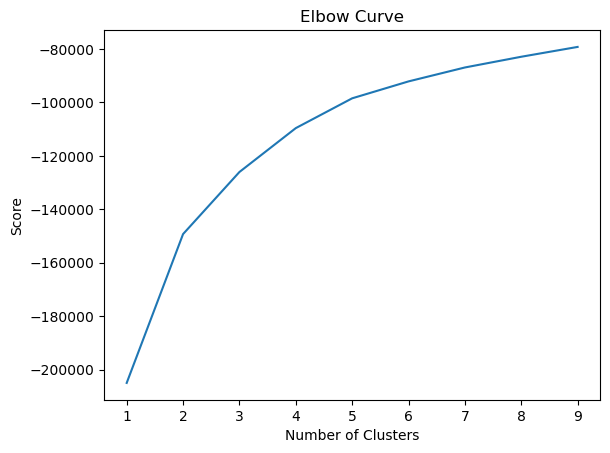

In [28]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Would still say 4 would be best option for clusters

## 4. k-means Clustering

In [29]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [30]:
# Fitting the k-means object to the normalized df.

kmeans.fit(stnd)

C:\Users\keirr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [31]:
df4['clusters'] = kmeans.fit_predict(stnd)

C:\Users\keirr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\keirr\AppData\Local\Temp\ipykernel_10508\1476716375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['clusters'] = kmeans.fit_predict(stnd)


In [32]:
df4.head()

,Price,Beds,Baths,Living Space,Zip Code Population,Median Household Income,clusters
3,760000.0,3,2,1538,29815,249880.0,3
5,764900.0,1,1,643,15514,188289.0,3
8,540000.0,2,1,750,39401,117438.0,3
9,570000.0,1,1,589,39401,117438.0,3
10,699999.0,3,1,1200,39401,117438.0,3


In [33]:
df4['clusters'].value_counts()

clusters
0    12888
2     7526
1     7307
3     6445
Name: count, dtype: int64

In [35]:
# Exporting dataset as csv 
df4.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cluster_Housing_Data.csv'))

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


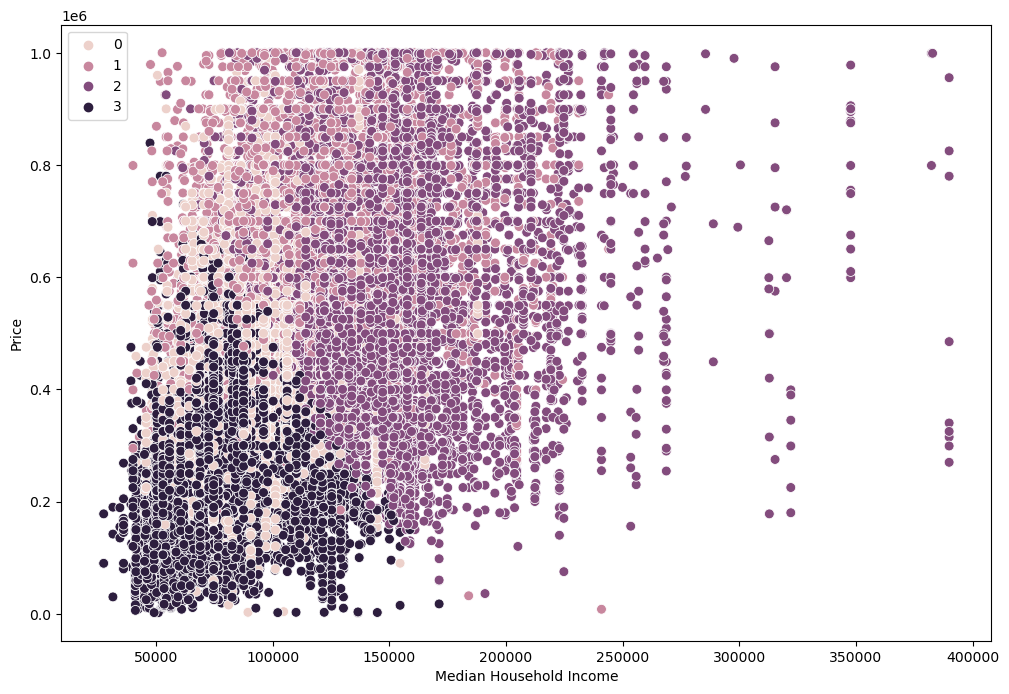

In [32]:
# Plotting the clusters for the "Price" and "Median Household Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df4['Median Household Income'], y=df4['Price'], hue=kmeans.labels_, s=50)  
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # No grid in background
plt.xlabel('Median Household Income') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Can clearly see different brackets of income based off prices of homes purchased, and although the level of income varies vastly, a similar pattern can be seen:
#### 3 = Dark Purple = Lower priced homes
#### 2 = Purple = Higher priced homes
#### 1 = Pink = Above Average priced homes
#### 0 = Light Pink =  Average priced homes

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


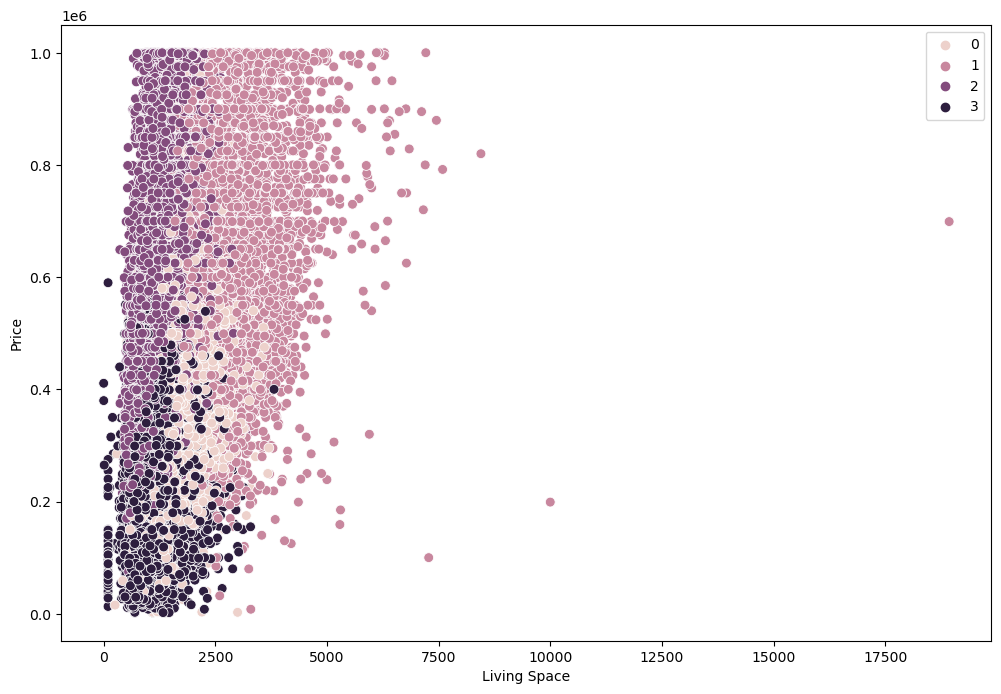

In [33]:
# Plot the clusters for the "Living Space" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df4['Living Space'], y=df4['Price'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Living Space') 
plt.ylabel('Price') 
plt.show()

### If we continue with the same house price clustering as above, all homes show a similar trend of being under 10K sq/ft, but varying in price

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


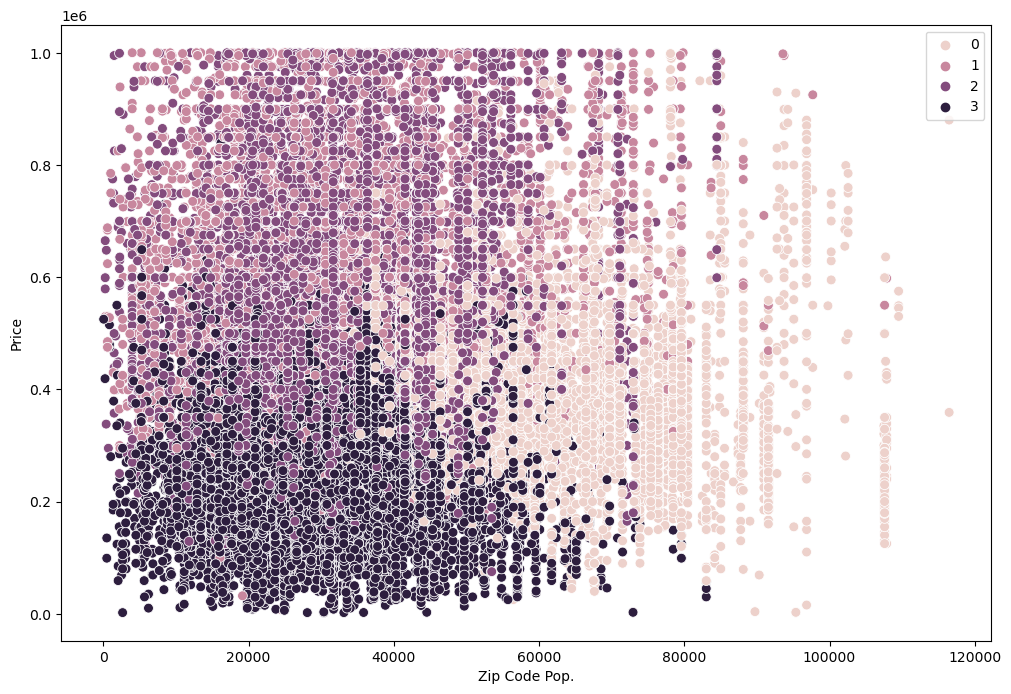

In [34]:
# Plot the clusters for the "Zip Code Pop" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df4['Zip Code Population'], y=df4['Price'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Zip Code Pop.') 
plt.ylabel('Price') 
plt.show()

### Population Density must have some play with prices of homes, as there is no direct correlation between the population of a specific zip code and the prices of homes, however:
#### Low priced homes tend to be located within populations <84,000
#### Large majority of homes are Average priced, and can be found in very low populations, as well as extremely high
#### Above Average priced homes tend to be seen within populations >= 40,000
#### High priced homes are again scattered throughout all population sizes

In [35]:
df4.loc[df4['clusters'] == 0, 'cluster'] = 'light pink'
df4.loc[df4['clusters'] == 3, 'cluster'] = 'dark purple'
df4.loc[df4['clusters'] == 2, 'cluster'] = 'purple'
df4.loc[df4['clusters'] == 1, 'cluster'] = 'pink'

C:\Users\keirr\AppData\Local\Temp\ipykernel_1492\1421494582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[df4['clusters'] == 0, 'cluster'] = 'light pink'
C:\Users\keirr\AppData\Local\Temp\ipykernel_1492\1421494582.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'light pink' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df4.loc[df4['clusters'] == 0, 'cluster'] = 'light pink'


In [36]:
df4.groupby('cluster').agg({'Price':['mean', 'median'], 
                         'Living Space':['mean', 'median'], 
                         'Zip Code Population':['mean', 'median'],
                          'Median Household Income':['mean', 'median']})

Price           Living Space         Zip Code Population  \
                      mean    median         mean  median                mean   
cluster                                                                         
dark purple  240561.050753  230000.0  1297.015797  1253.0        30703.354550   
light pink   377433.375319  352900.0  1712.966168  1680.0        61651.613451   
pink         584205.827464  559900.0  2768.485248  2634.0        32442.449354   
purple       573879.119401  550000.0  1346.008187  1304.0        31906.630677   

                     Median Household Income            
              median                    mean    median  
cluster                                                 
dark purple  31016.0            78041.776142   74868.0  
light pink   59752.0            91410.702717   90457.0  
pink         31008.0           115670.004759  112781.0  
purple       31248.0           151319.519617  144942.0

## Based on the averages...
### 3 = Dark Purple = Lower priced homes; Living Space = 1,297sq/ft, Zip Pop. = 30.7K, Median Income = 78K
#### *Dark purple follows it's given title of 'Low priced homes', smaller average population, with the smallest living space. Perhaps these are apartments/townhomes (2-3 bedrooms), or older/smaller homes.

### 2 = Purple = Higher priced homes; Living Space = 1,346sq/ft, Zip Pop. = 31.9K, Median Income = 1.5M
#### *The living space compared to the range of prices seen in the graphs above seem off, however these could be luxury condos/high-rise apartments 

### 1 = Pink = Above Average priced homes; Living Space = 2,768sq/ft, Zip Pop. = 32.4K, Median Income = 1.1M
#### *Highest amount of living space, and higher income could signify suburbs, where prices and space allows for bigger builds, plus saved income (single/multi-family homes)

### 0 = Light Pink =  Average priced homes; Living Space = 1,712sq/ft, Zip Pop. = 61.6K, Median Income = 91K
#### *Similar to pink, however there is slightly less living space, perhaps due to popularity of location the prices of these homes come with a slighly larger price tag.